### Business Case 2

### Business Understanding to be discussed in report , and later

In [1]:
#import necessary modules/libraries
import numpy as np
import scipy
import pandas as pd
import datetime as dt
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import AgglomerativeClustering , KMeans, DBSCAN

#!{sys.executable} -m pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_digits
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, recall_score, classification_report, average_precision_score, precision_recall_curve


In [2]:
#imports dataframes

dataframe = pd.read_csv("H2.csv")
dataframe.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


##  Stage: Data understanding Stage

#### INITIAL EXPLORATION, CLEANING & FEATURE ENGINEERING

In [3]:
#get info

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [4]:
#Step1 Checking for missing values
dataframe.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [5]:
#31748 duplicate rows in total - the rows refer to separate events

dataframe[dataframe.duplicated(keep=False)]['IsCanceled'].value_counts()

1    19467
0    12281
Name: IsCanceled, dtype: int64

In [6]:
#in total, there seem to be very few missing value
#features whose expected values are numeric look to be numeric. 
#some numeric and object variables may be converted to date-time

dataframe['Country'].fillna('NULL', inplace = True)
dataframe['Children'].fillna(np.mean(dataframe['Children']), inplace = True)

In [7]:
dataframe.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79330,NaN,NaN,NaN,0.0913698,0.372167,0,0,0,0,3


In [8]:
#SOME DATA EXPLORATION

array([[<AxesSubplot:title={'center':'IsCanceled'}>,
        <AxesSubplot:title={'center':'LeadTime'}>,
        <AxesSubplot:title={'center':'ArrivalDateYear'}>,
        <AxesSubplot:title={'center':'ArrivalDateWeekNumber'}>],
       [<AxesSubplot:title={'center':'ArrivalDateDayOfMonth'}>,
        <AxesSubplot:title={'center':'StaysInWeekendNights'}>,
        <AxesSubplot:title={'center':'StaysInWeekNights'}>,
        <AxesSubplot:title={'center':'Adults'}>],
       [<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Babies'}>,
        <AxesSubplot:title={'center':'IsRepeatedGuest'}>,
        <AxesSubplot:title={'center':'PreviousCancellations'}>],
       [<AxesSubplot:title={'center':'PreviousBookingsNotCanceled'}>,
        <AxesSubplot:title={'center':'BookingChanges'}>,
        <AxesSubplot:title={'center':'DaysInWaitingList'}>,
        <AxesSubplot:title={'center':'ADR'}>],
       [<AxesSubplot:title={'center':'RequiredCarParkingSpaces'}>,
        <Axe

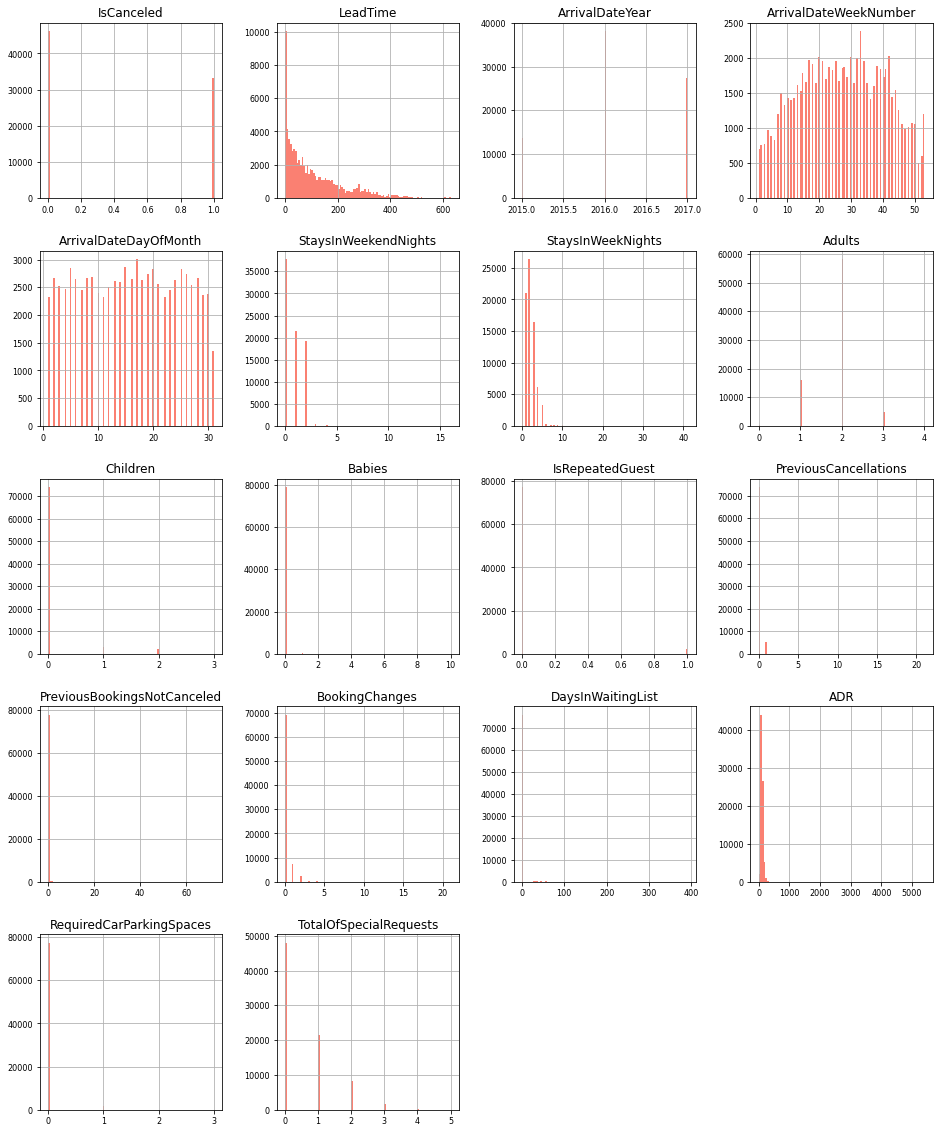

In [9]:
#Plot the distributions of each feature
dataframe.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8, color = 'salmon')

In [10]:
#very few ordinarily metric features

metric_features = ['LeadTime', 'StaysInWeekNights', 'StaysInWeekendNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces']
non_metric_features = ['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'Country', 'ArrivalDateDayOfMonth', 'Meal', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Company', 'Agent', 'CustomerType', 'ReservationStatus', 'ReservationStatusDate']

In [11]:
#hidden ofor faster computation

#perform a very simple pairplot
g = sns.PairGrid(dataframe[metric_features], height = 10, corner = True)

#frequency histogram on diagonal
g.map_diag(sns.histplot, color = 'grey', stat = 'frequency', kde = True)

#regplot is a scatter with regression line
g.map_offdiag(sns.regplot, fit_reg=True, x_jitter=.1, color = 'salmon',  marker = 'x')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

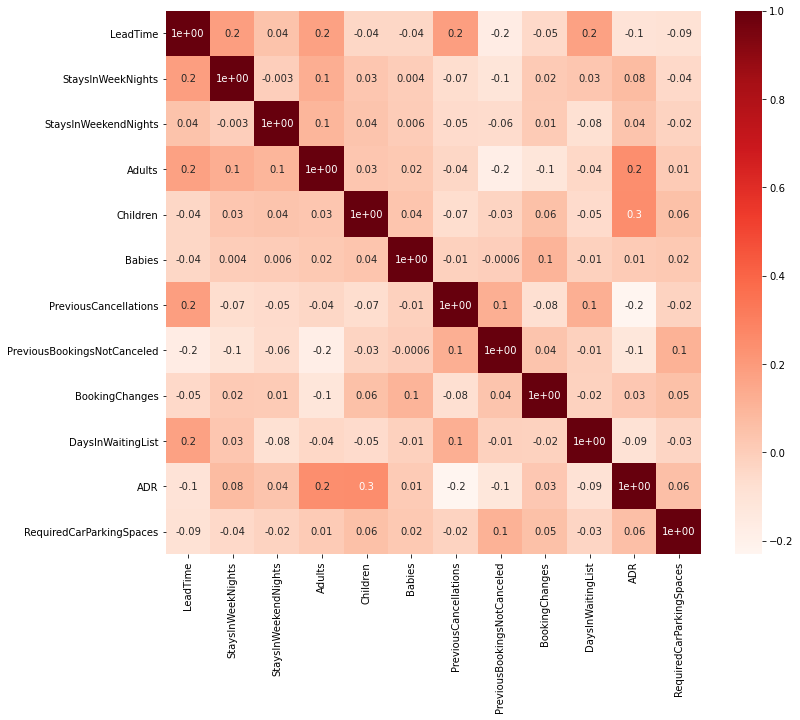

In [12]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
    
cor_spearman = dataframe[metric_features].corr(method = 'spearman')
cor_heatmap(cor_spearman)

### Immediate observations

Very low correlations throughout among metric features.
Still need to verify what to do concerning outliers.

### Check what to do with categoricals:

check their values and see what to do next

namely:

potentially create dummy variables for non binary categoricals.

In [13]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="skyblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.xticks(rotation='vertical')
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="skyblue")
    plt.xticks(rotation='vertical')
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

In [15]:
#removing date: to many uniques

dataframe = dataframe.drop('ReservationStatusDate', axis = 1)

In [16]:
#SOME FEATURE ENGINEERING

In [17]:
#copy 
df_ohc_train = dataframe.copy()

In [18]:
non_metric_features = ['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'Country', 'ArrivalDateDayOfMonth', 'Meal', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Company', 'Agent', 'CustomerType', 'ReservationStatus']

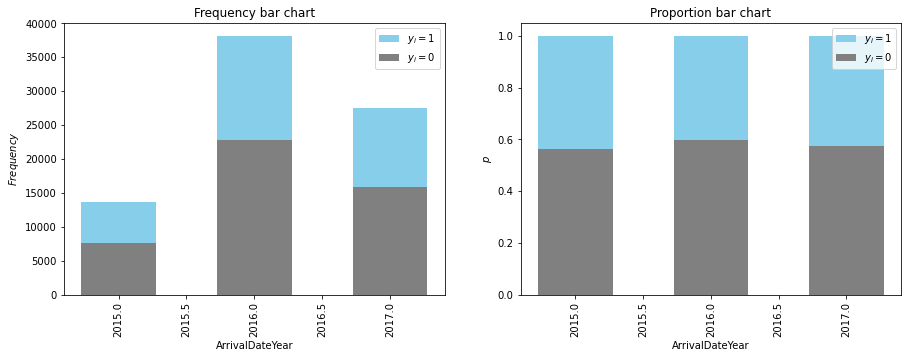

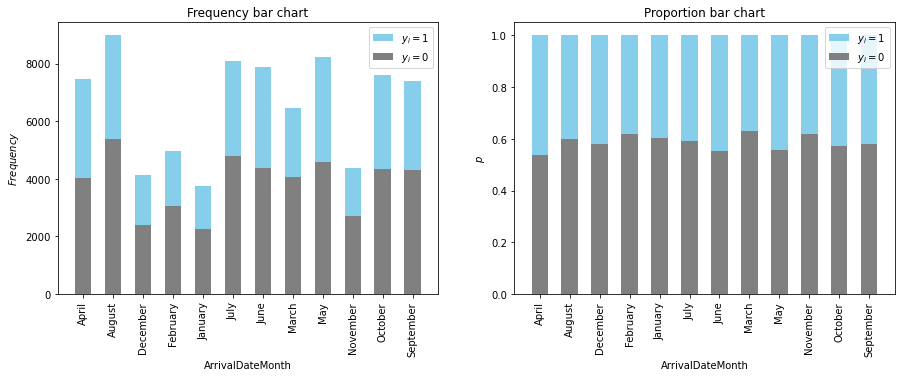

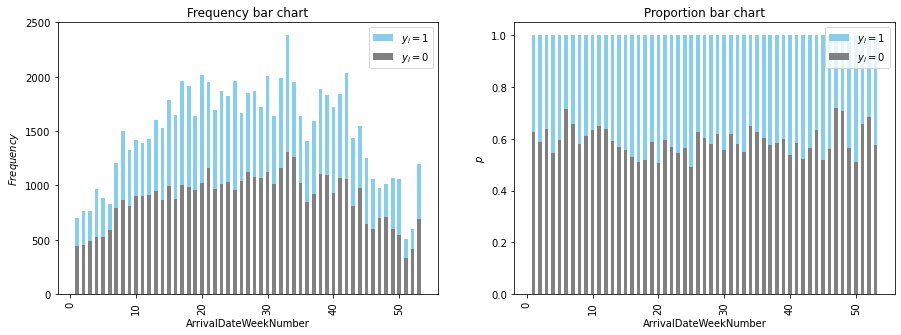

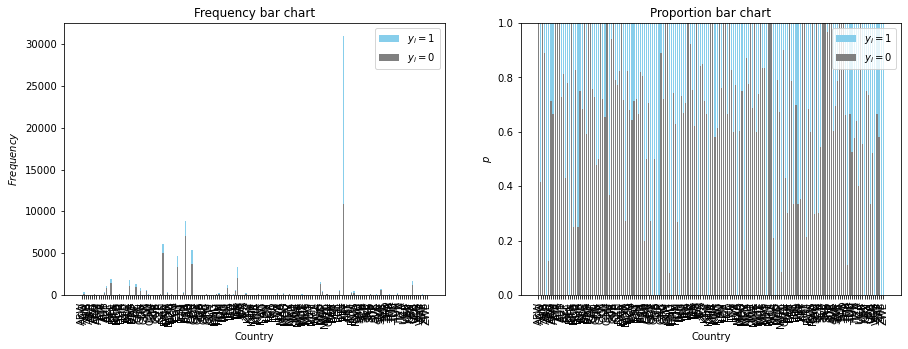

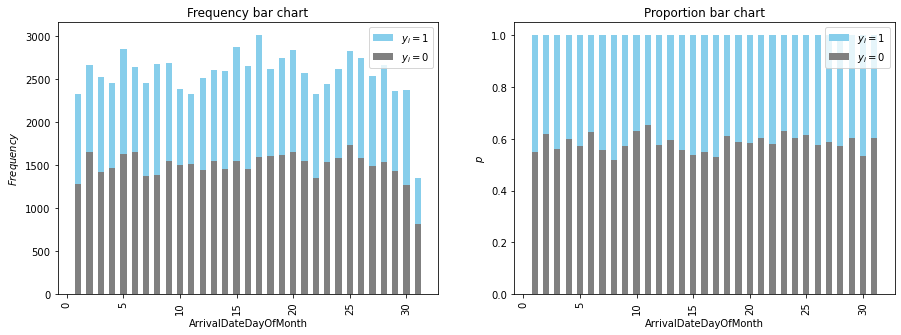

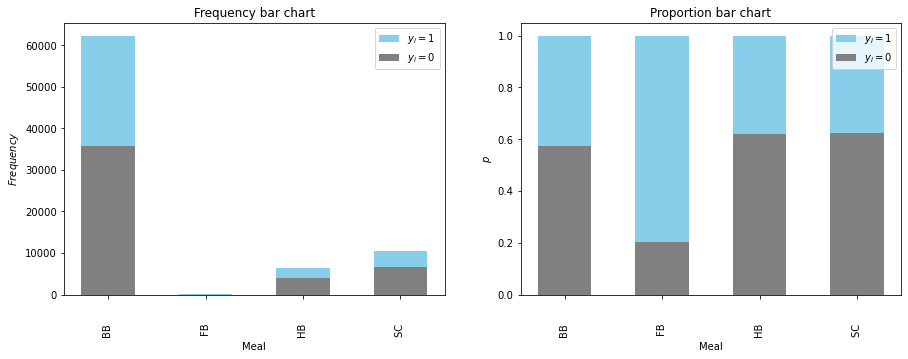

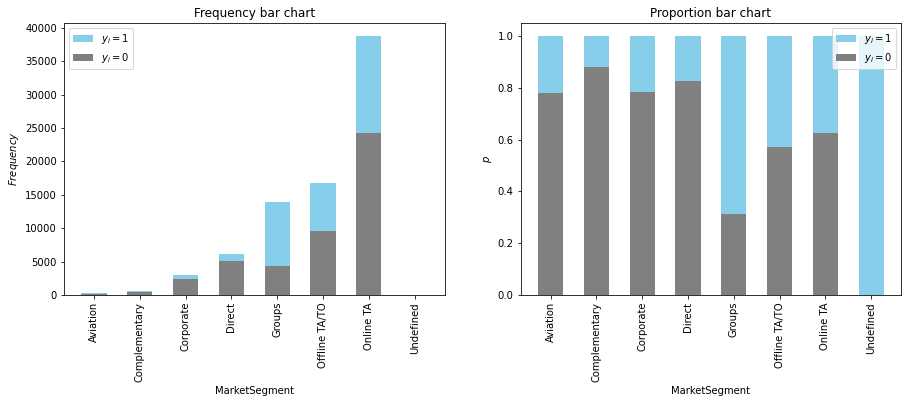

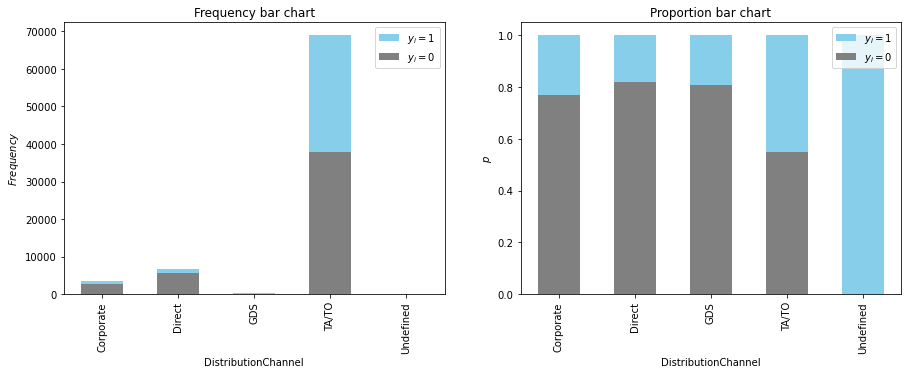

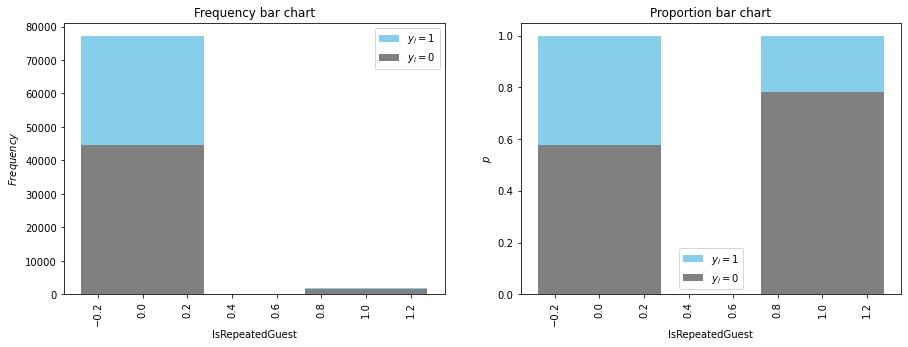

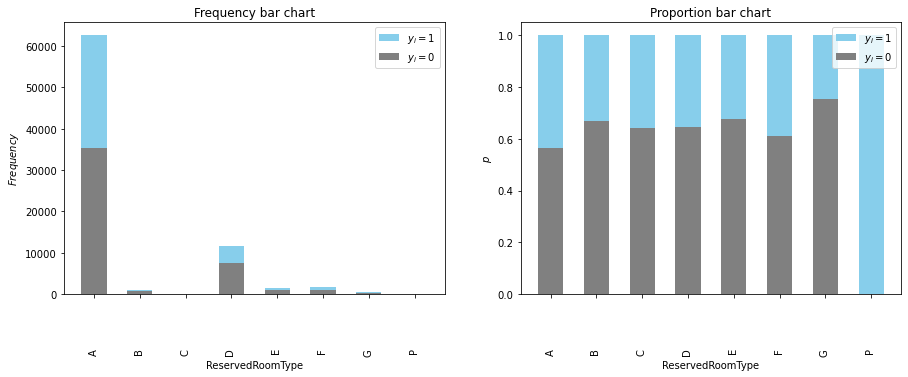

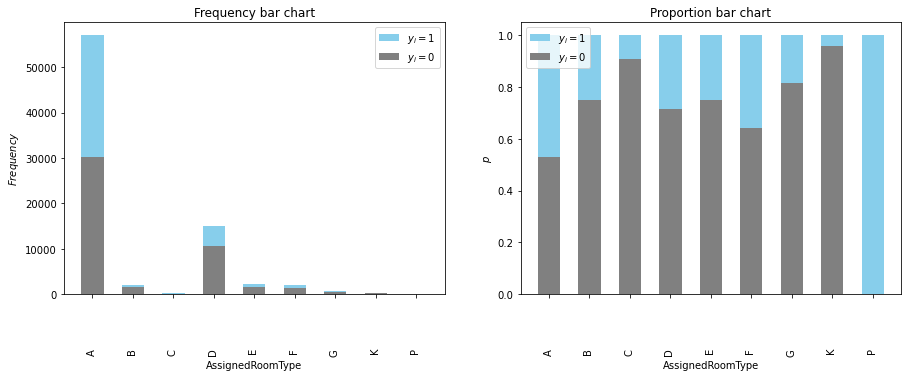

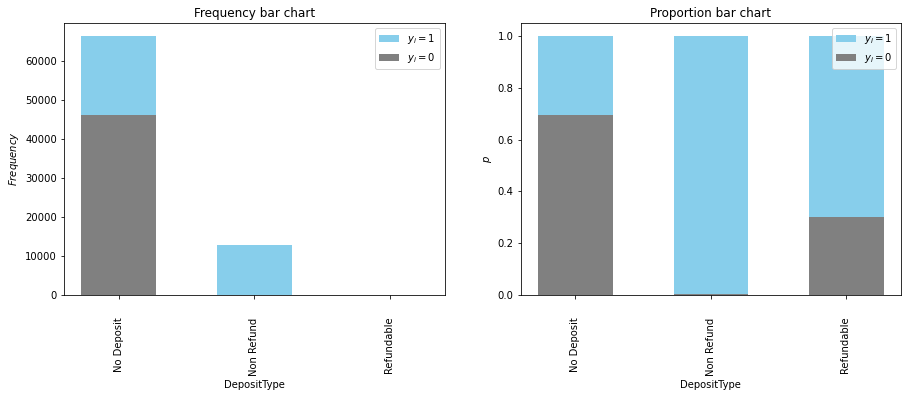

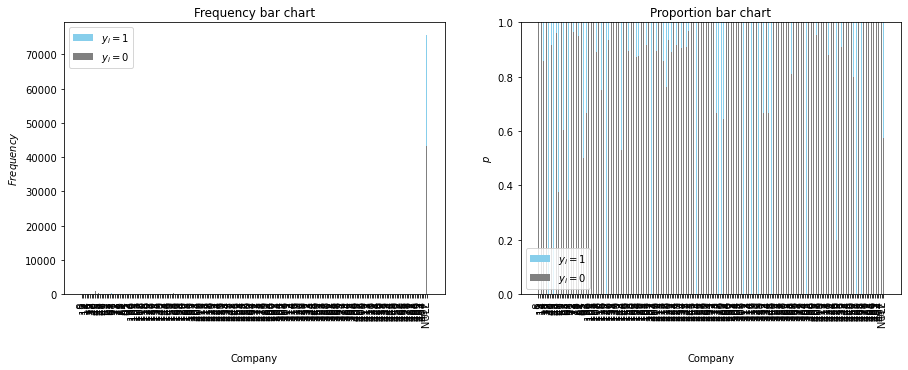

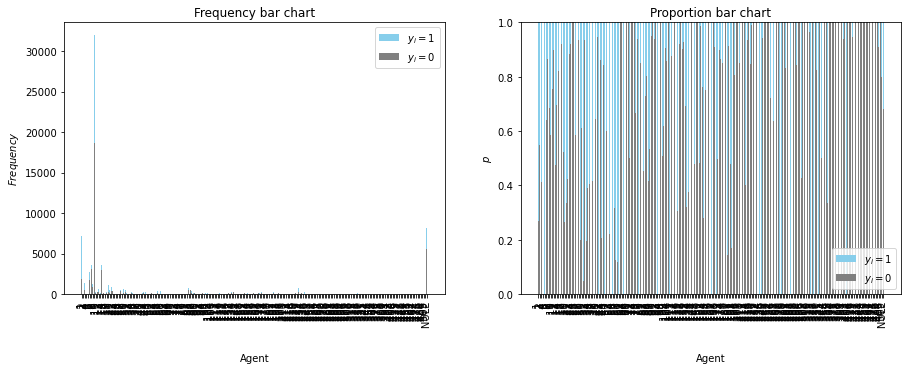

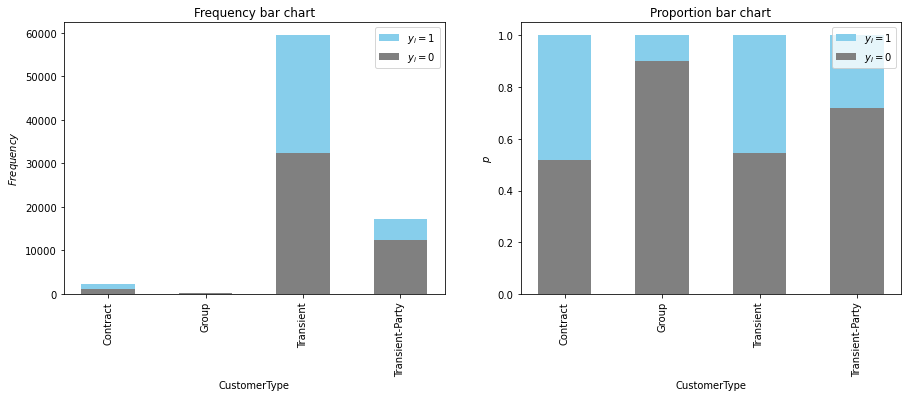

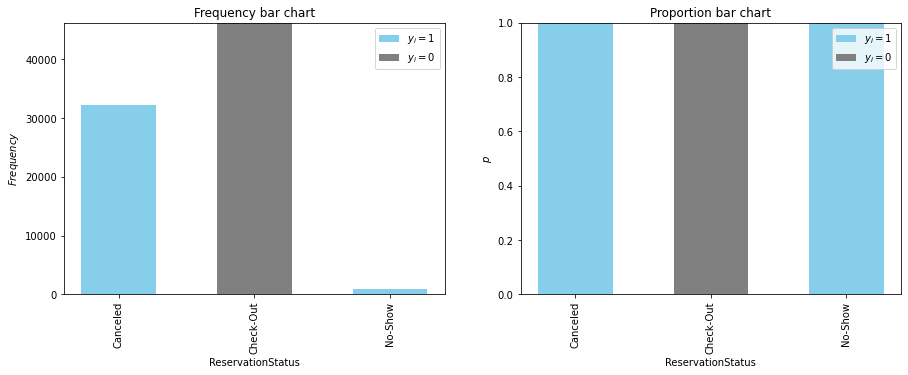

In [14]:
for var in non_metric_features:
    bar_charts_categorical(dataframe, var, 'IsCanceled')

In [19]:
#Its time to convert variables to dummies

ohc = OneHotEncoder(sparse=False, drop='first')
ohc_feat_train = ohc.fit_transform(df_ohc_train[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df_train = pd.DataFrame(ohc_feat_train, index=df_ohc_train.index, columns=ohc_feat_names) 

In [20]:
#562 colunas?

ohc_df_train.columns

Index(['x0_2016', 'x0_2017', 'x1_August', 'x1_December', 'x1_February',
       'x1_January', 'x1_July', 'x1_June', 'x1_March', 'x1_May',
       ...
       'x13_        480', 'x13_        484', 'x13_        495',
       'x13_        509', 'x13_       NULL', 'x14_Group', 'x14_Transient',
       'x14_Transient-Party', 'x15_Check-Out', 'x15_No-Show'],
      dtype='object', length=728)

In [21]:
#ONE-HOT ENCODING TO ENCODE CATEGORICAL VARIABLES

In [22]:
df_ohc_train = pd.concat([dataframe.drop(columns=non_metric_features), ohc_df_train], axis=1)
df_ohc_train

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,...,x13_ 480,x13_ 484,x13_ 495,x13_ 509,x13_ NULL,x14_Group,x14_Transient,x14_Transient-Party,x15_Check-Out,x15_No-Show
0,0,6,0,2,1,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,88,0,4,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,65,0,4,1,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,92,2,4,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,100,0,2,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79326,0,102,2,5,3,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79327,0,34,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79328,0,109,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# OUTLIERS

In [23]:
#CHECKING FOR OUTLIERS
#copying version
df_outlier_train = df_ohc_train.copy()

In [24]:
lof = LocalOutlierFactor(n_neighbors=40)
lof_labels = lof.fit_predict(df_outlier_train[metric_features])
Counter(lof_labels)

Counter({1: 73062, -1: 6268})

In [25]:
lof_outliers = df_ohc_train[lof_labels==-1]
df_outliers = df_ohc_train.loc[lof_outliers.index.to_list(),:]
df_outliers = df_outliers.reset_index()
df_outliers

,index,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,...,x13_ 480,x13_ 484,x13_ 495,x13_ 509,x13_ NULL,x14_Group,x14_Transient,x14_Transient-Party,x15_Check-Out,x15_No-Show
0,44,0,69,0,2,2,1.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,53,0,54,2,8,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,54,1,90,5,15,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,55,1,90,5,15,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,1,117,5,15,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263,79266,0,186,0,3,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6264,79267,0,186,0,3,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6265,79274,0,325,0,4,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6266,79289,0,186,0,3,2,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
#model = DBSCAN(eps = 400, min_samples = 3).fit(df_outlier_train[metric_features])
#db_outliers = df_outlier_train[metric_features[df_outlier_train[metric_features][model.labels_ == -1]]]
#db_outliers.reset_index(inplace = True) 
#db_outliers

## Test 1 - no outlier removal

In [49]:
df_normalization_train = df_outlier_train.copy()

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
#scaler = RobustScaler()
#try MinMax with feature_range=(-1,1) as well
df_normalization_train_metric = pd.DataFrame(scaler.fit_transform(df_normalization_train), index=df_normalization_train.index)

In [53]:
#rename 
df_normalization_train_metric.columns = df_normalization_train.columns
df_normalization_train = df_normalization_train_metric

#go back to normalization train
df_normalization_train

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,...,x13_ 480,x13_ 484,x13_ 495,x13_ 509,x13_ NULL,x14_Group,x14_Transient,x14_Transient-Party,x15_Check-Out,x15_No-Show
0,0.0,0.009539,0.000,0.048780,0.25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.139905,0.000,0.097561,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.103339,0.000,0.097561,0.25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.146264,0.125,0.097561,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.158983,0.000,0.048780,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.036566,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79326,0.0,0.162162,0.125,0.121951,0.75,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79327,0.0,0.054054,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79328,0.0,0.173291,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [54]:
df_fselection_train = df_normalization_train.copy()

# INITIAL FEATURE SELECTION

In [56]:
#defines numerical and categorical variables

categorical_variables = [variable for variable in df_fselection_train.columns if variable not in metric_features]
categorical_variables.remove('IsCanceled') #lets drop the dependent variable

1. Correlation numerical variables against the Target

<AxesSubplot:>

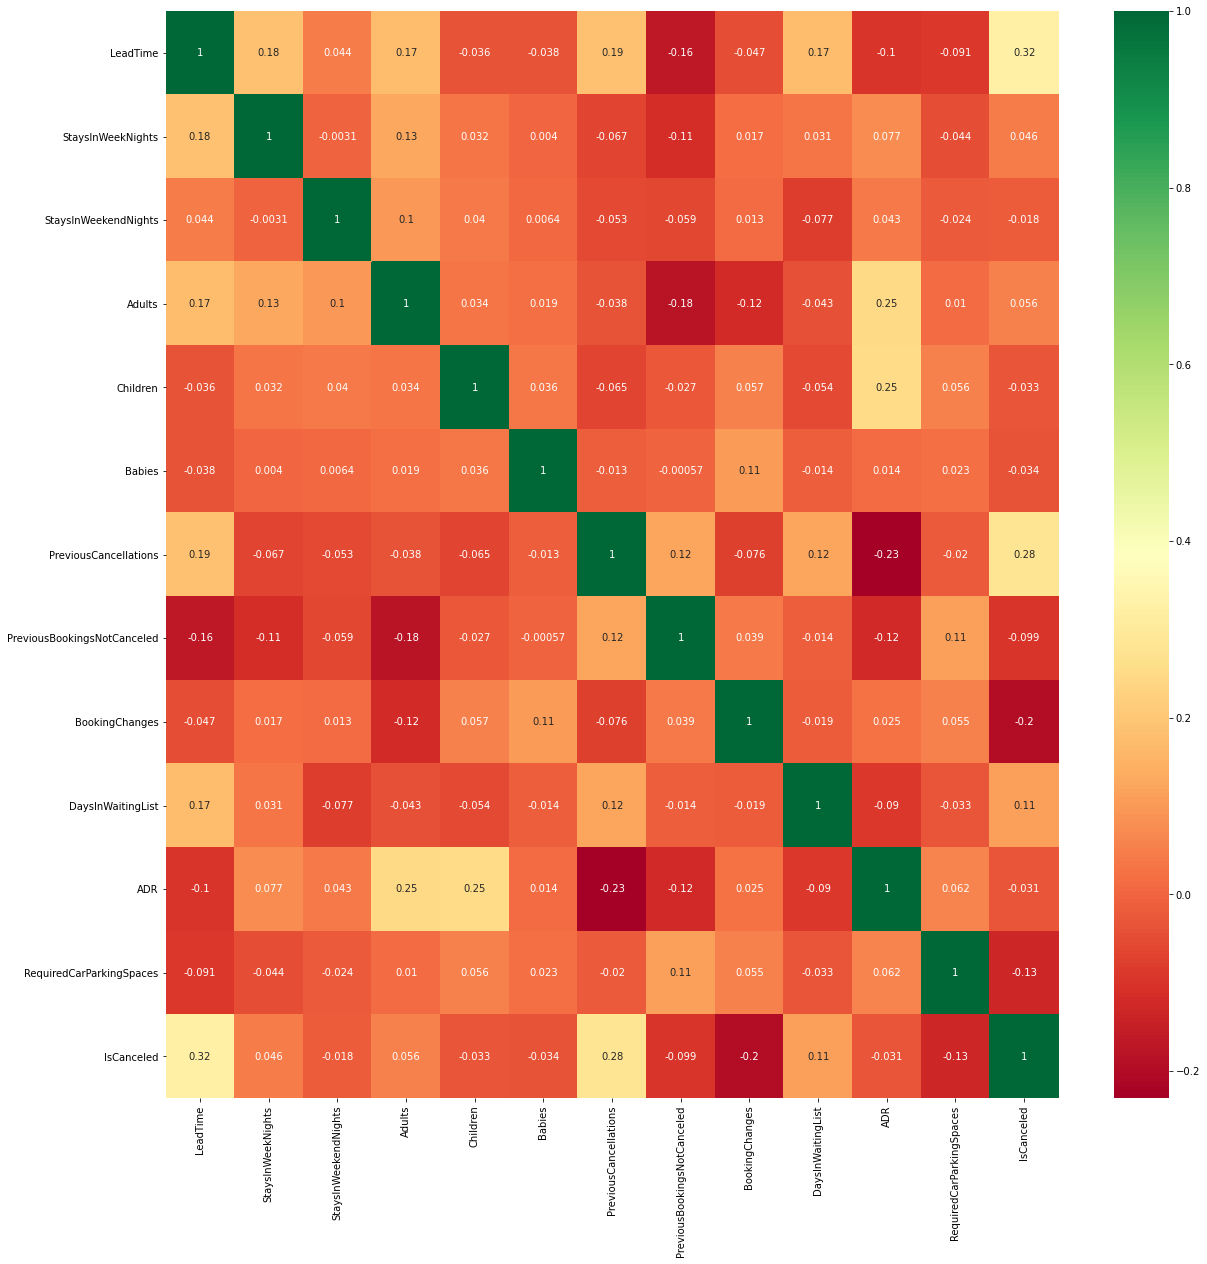

In [58]:
#Correlation Matrix with Heatmap
plt.figure(figsize=(20,20))
#plot heat map with target
df=pd.concat([df_fselection_train[metric_features], df_fselection_train['IsCanceled']], axis=1)

#spearman corr of metric features
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="RdYlGn")

None of the metric_features are highly (un)correlated between themselves, we're gonna keep them all!

### For feature selection, we'll be applying Chi2 and MIC for feature selection of categoricals! Apply then some other for the continuous!

In [59]:
X = df_fselection_train.drop("IsCanceled", axis=1)[categorical_variables]
y = df_fselection_train["IsCanceled"]

### Given high number of features to consider, we are actually going for for now, we'll focus on the most significant 

1. Chi2 for Categorical Variables

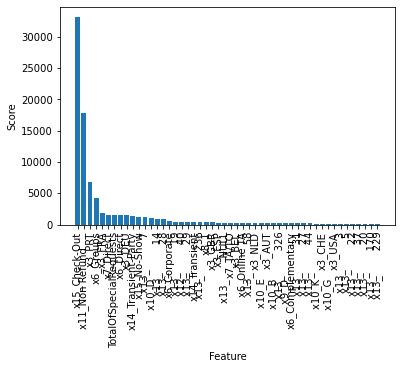

In [62]:
threshold = 50
high_score_features_chi2 = []
scores = []
names_Chi2 = []

#select k best with chi-square test and append the results to list
feature_scores = SelectKBest(chi2, k=threshold).fit(X,y).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)
 
plt.bar(names_Chi2, scores)
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Feature')
plt.show()

2. MIC for Categorical Variables

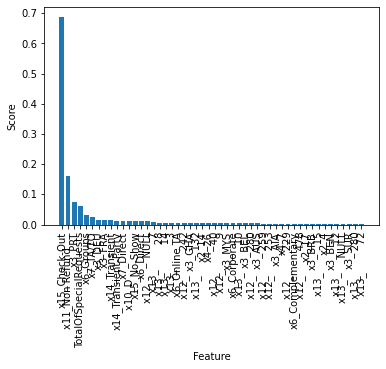

In [63]:

#that this is the best method for categorical variables and categorical output
threshold = 50 #selects number of most relevant features and append them to list
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X, y, random_state=0)
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)
plt.bar(names_MIC, scores)
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Feature')
plt.show()

In [66]:
###We're gonna use the intersection of the features chosen by both this models!

common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))

features_selected = common_categorical_features + metric_features

In [71]:
#final set of features

features_selected

['x14_Transient-Party',
 'x3_DEU',
 'x6_Direct',
 'x12_         40',
 'x13_         28',
 'x13_         14',
 'x11_Non Refund     ',
 'x14_Transient',
 'x6_Complementary',
 'x6_Online TA',
 'x13_       NULL',
 'x3_PRT',
 'x6_Corporate',
 'x6_Groups',
 'x7_Direct',
 'x15_Check-Out',
 'x13_          3',
 'x3_BEL',
 'x10_D               ',
 'x15_No-Show',
 'x7_TA/TO',
 'x13_          7',
 'x3_FRA',
 'TotalOfSpecialRequests',
 'LeadTime',
 'StaysInWeekNights',
 'StaysInWeekendNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces']

# MODEL TESTING & SELECTION

We will make a split between between train and test. As we will use cross validation (repeated_Stratified_k_fold)



In [73]:
#small check of proportion between 1s and 0s

#it is not perfectly balanced, but somewhat balanced - may need to use smoteor another over(or undersmapling technique)
#dealing with outliers is need be

df_fselection_train['IsCanceled'].value_counts()

0.0    46228
1.0    33102
Name: IsCanceled, dtype: int64

In [74]:
#onlu go forward with the determined 36 features we selected
df_train_validation_test = df_fselection_train.copy().drop('IsCanceled', axis = 1)[features_selected]

In [75]:
#train_test_split to get 20% of data as test

X_train_val, X_test, y_train_val, y_test = train_test_split(df_train_validation_test,
                                                  df_fselection_train["IsCanceled"],
                                                  test_size = 0.30,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=df_fselection_train["IsCanceled"])

In [76]:
#run desired model
def run_model(model_name, X, y):
    
    ###STANDALONE MODELS
    if model_name == 'KNN':
        #Manhattan distance, which should work better for high dimensional datasets
        #weights to attribute higher weight to closer neighbors; seems to improve score highly
        model = KNeighborsClassifier(n_neighbors=10, p = 1, weights='distance').fit(X, y) #
    if model_name == 'LR':
        model = LogisticRegression().fit(X, y) #
    if model_name == 'NB': 
        model = GaussianNB().fit(X, y)
    if model_name == 'BNB': #
        model = BernoulliNB().fit(X, y)
    if model_name == 'MNB': #
        model = MultinomialNB().fit(X, y)
    if model_name == 'NN': #
        model = MLPClassifier(alpha=0.01, hidden_layer_sizes = (5,5), activation = 'tanh', solver = 'adam', learning_rate = 'adaptive', verbose = 0, learning_rate_init = 0.02, batch_size = 1000, max_iter = 1000).fit(X, y)
    if model_name == 'DT':
        model = DecisionTreeClassifier(criterion='entropy', max_depth = 14, min_samples_split= 50).fit(X, y) #max_features=6,
    if model_name == 'SVM': #
        model = svm.SVC(C=0.05, degree=2, gamma='scale', kernel='rbf').fit(X, y)
    
    ###ENSEMBLES
    if model_name == 'RF':
        model = RandomForestClassifier(max_depth = 11, random_state = 5, n_estimators=500, min_samples_leaf = 3).fit(X, y) #max_features=6, #max_depth é super imp para reduzir overfitting! #min_samples_lead highly reduces overfitting!
    if model_name == 'Bagg_NN':
        model = BaggingClassifier(base_estimator = MLPClassifier(alpha=0.01, hidden_layer_sizes = (5,5), activation = 'tanh', solver = 'adam', learning_rate = 'adaptive', verbose = 0, learning_rate_init = 0.02, batch_size = 1000, max_iter = 1000), n_estimators = 5, random_state = 5).fit(X, y)
    if model_name == 'AdaBoost':
        model = AdaBoostClassifier(n_estimators = 95, learning_rate = 0.8, random_state = 5).fit(X, y) #importante que GSearchCV em DT maximizado!
    if model_name == 'GBoost':
        model = GradientBoostingClassifier(n_estimators=175, learning_rate=0.1, random_state=15).fit(X, y)
    
    return model


In [77]:
#averages scores of each run (for the present model) in each iteration of Repeated 10-fold CV that has been called
def avg_score(method,X,y, model_name):
    
    f1micro_train = []
    f1micro_val = []
    precision_train = []
    precision_val = []
    recall_train = []
    recall_val = []
    timer = []
    cm_holder = []
    averaged_confusion_matrix=None
    
    for train_index, val_index in method.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        begin = time.perf_counter()
        model = run_model(model_name, X_train, y_train)
        end = time.perf_counter()
        
        labels_train = model.predict(X_train)
        labels_val = model.predict(X_val)
        
        f1micro_train.append(f1_score(y_train, labels_train, average='micro'))
        f1micro_val.append(f1_score(y_val, labels_val, average='micro'))
        
        precision_train.append(precision_score(y_train, labels_train))
        precision_val.append(precision_score(y_val, labels_val))
        
        recall_train.append(recall_score(y_train, labels_train))
        recall_val.append(recall_score(y_val, labels_val))
        
        timer.append(end-begin)
        
        if model_name == 'GBoost':
            cm_holder.append(confusion_matrix(y_val, labels_val))
        
    model = run_model(model_name, X,y)
    labels_test = model.predict(X_test)
    
    f1micro_test = f1_score(y_test, labels_test, average='micro')
    precision_test = precision_score(y_test, labels_test)
    recall_test = recall_score(y_test, labels_test)
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_f1_train = round(np.mean(f1micro_train),3)
    avg_f1_val = round(np.mean(f1micro_val),3)
    avg_f1_test = round(np.mean(f1micro_test),3)
    avg_precision_train = round(np.mean(precision_train),3)
    avg_precision_val = round(np.mean(precision_val),3)
    avg_precision_test = round(precision_test,3)
    avg_recall_train = round(np.mean(recall_train),3)
    avg_recall_val = round(np.mean(recall_val),3)
    avg_recall_test = round(recall_test,3)
    
    std_time = round(np.std(timer),3)
    std_f1_train = round(np.std(f1micro_train),3)
    std_f1_val = round(np.std(f1micro_test),3)
    std_precision_train = round(np.std(precision_train),3)
    std_precision_val = round(np.std(precision_val),3)
    std_recall_train = round(np.std(recall_train),3)
    std_recall_val = round(np.std(recall_val),3)
    
    averaged_confusion_matrix = np.mean(cm_holder, axis = 0).round(2)
    
    #from sklearn.metrics import cohen_kappa_score
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_f1_train) + '+/-' + str(std_f1_train), str(avg_f1_val) + '+/-' + str(std_f1_val), str(avg_f1_test), str(avg_precision_train) + '+/-' + str(std_precision_train), str(avg_precision_val) + '+/-' + str(std_precision_val), str(avg_precision_test), str(avg_recall_train) + '+/-' + str(std_recall_train), str(avg_recall_val) + '+/-' + str(std_recall_val), str(avg_recall_test), averaged_confusion_matrix


In [ ]:
###STANDALONE MODELS:

#runs each Repeated (10) 10-fold Cross-Validation in all tested models by calling function avg_score and prints resutls with multiple metrics for each

method_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state = 15)

results_KNN = avg_score(method_cv, X_train_val, y_train_val, 'KNN')
results_LR = avg_score(method_cv, X_train_val, y_train_val, 'LR')
results_NB = avg_score(method_cv, X_train_val, y_train_val, 'NB')
results_BNB = avg_score(method_cv, X_train_val, y_train_val, 'BNB')
results_MNB = avg_score(method_cv, X_train_val, y_train_val, 'MNB')
results_NN = avg_score(method_cv, X_train_val, y_train_val, 'NN')
results_DT = avg_score(method_cv, X_train_val, y_train_val, 'DT')
resultsSVM = avg_score(method_cv, X_train_val, y_train_val, 'SVM')


In [ ]:
results_models = [results_KNN, results_LR, results_NB, results_BNB, results_MNB, results_NN, results_DT, resultsSVM]

f1micro_train = []
f1micro_val = []
f1micro_test = []

precision_train = []
precision_val = []
precision_test = []

recall_train = []
recall_val = []
recall_test = []

times = []

#organizes data for futher plotting
for i, model in enumerate(results_models):
    
    f1micro_train.append(results_models[i][1])
    f1micro_val.append(results_models[i][2])
    f1micro_test.append(results_models[i][3])
    
    precision_train.append(results_models[i][4])
    precision_val.append(results_models[i][5])
    precision_test.append(results_models[i][6])
    
    recall_train.append(results_models[i][7])
    recall_val.append(results_models[i][8])
    recall_test.append(results_models[i][9])
    
    times.append(results_models[i][0])
    
results = [f1micro_train, f1micro_val, f1micro_test, precision_train, precision_val, precision_test, recall_train, recall_val, recall_test, times]

df = pd.DataFrame(results, index = ['Train Accuracy (F1 Score micro)', 'Validation Accuracy (F1 Score micro)', 'Test Accuracy (F1 Score micro)', 'Precision Train', 'Precision Validation', 'Precision Test', 'Recall Train', 'Recall Validation', 'Recall Test', 'Time'], columns = ['KNN', 'LR', 'NB', 'BNB', 'MNB', 'NN', 'DT', 'SVM'])

df

In [ ]:
models = ['KNN', 'LR', 'NB', 'BNB', 'MNB', 'NN', 'DT', 'SVM']

def plt_bar(models, f1micro_train, f1micro_val, f1micro_test):
    
    #Creates a figure and a set of subplots
    fig, ax = plt.subplots(figsize = (10, 5))

    #sets style of the plot to increase readibility
    sns.set_style(style="whitegrid")

    #set width of bar
    barwidth = 0.3

    #set position of bar on X axis
    pos_train = np.arange(len(f1micro_test))
    pos_val = np.arange(len(f1micro_test))+0.3
    pos_test = np.arange(len(f1micro_test))+0.6

    #makes the plot
    plt.bar(pos_train, f1micro_train, color='dodgerblue', width=barwidth, edgecolor='white', label='Train')
    plt.bar(pos_val, f1micro_val, color='steelblue', width=barwidth, edgecolor='white', label='Validation')
    plt.bar(pos_test, f1micro_test, color='skyblue', width=barwidth, edgecolor='white', label='Validation')

    #sets x, y labels
    ax.set(xlabel = 'Model', ylabel = 'Accuracy')

    #sets x ticks locations and designation
    ax.set_xticks((pos_train+pos_val+pos_test)/3)
    ax.set_xticklabels(models, rotation='vertical')

    #personalizes yticks to inrease readibility of data in the plot
    ax.set_yticks(np.arange(0, 1, 0.1))

    #ads title to the plot
    plt.title('10-fold Repeated Cross-Validation Results', fontsize = 14)

    #removes box to make the plot prettier
    plt.box(on=None)

    #Creates (pretty) legend
    plt.legend(frameon=False)

    #shows plot
    plt.show()
    
plt_bar(models, f1micro_train, f1micro_val, f1micro_test)

In [ ]:
plt.figure()

# Add models to list of models to incorporte in ROC curve
models = [{'label': 'KNN', 'model': run_model('KNN', X_train_val, y_train_val),},
          {'label': 'LR', 'model': run_model('LR', X_train_val, y_train_val),},
          {'label': 'NB','model': run_model('NB', X_train_val, y_train_val),},
          {'label': 'BNB', 'model': run_model('BNB', X_train_val, y_train_val),},
          {'label': 'MNB', 'model': run_model('MNB', X_train_val, y_train_val),},
          {'label': 'NN', 'model': run_model('NN', X_train_val, y_train_val),},
          {'label': 'DT', 'model': run_model('DT', X_train_val, y_train_val),},] 
            #SVM not included coz there's no probs!

    
def plot_roc_pr(models, X, y):  
    sns.set_style(style="whitegrid")
    # Below for loop iterates through your models list
    for m in models:
        model = m['model']
        y_pred=model.predict(X) # predict the test data
    #Compute False postive rate, and True positive rate
        fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:,1])
    #Calculate AUC
        auc = roc_auc_score(y,model.predict_proba(X)[:,1])
    #Plot
        plt.plot(fpr, tpr, label='%s ROC (area = %0.4f)' % (m['label'], auc))
    #Makes it pretty!
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC Curve Test')
    plt.legend(loc="lower right", frameon=False)
    plt.show()

    
    # Below for loop iterates through your models list
    for m in models:
        model = m['model']
        y_pred=model.predict(X) # predict the test data
    #Compute Precision and Recall
        precision, recall, _ = precision_recall_curve(y, model.predict_proba(X)[:,1])
    #Calculate AP
        ap = average_precision_score(y, model.predict_proba(X)[:,1])
    #Plot
        plt.plot(recall, precision, label='%s AP (area = %0.4f)' % (m['label'], ap))
    #Makes it pretty!
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Positive Predictive Value)')
    plt.ylabel('Precision (True Positive Rate)')
    plt.title('Precision-Recall Curve Test')
    plt.legend(loc="lower left", frameon=False)
    plt.show()

plot_roc_pr(models, X_test, y_test)

Given the fact that Decision Trees were a standalone model that yielded the best results (along with Neural Networks and Logistic Regression), we decided to try out a few ensemble methods that have Decision Trees as base learners:

In [ ]:
method_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state = 15)

results_Bag_NN = avg_score(method_cv, X_train_val, y_train_val, 'Bagg_NN')
results_RF = avg_score(method_cv, X_train_val, y_train_val, 'RF')
results_AdaBoost = avg_score(method_cv, X_train_val, y_train_val, 'AdaBoost')
results_GBoost = avg_score(method_cv, X_train_val, y_train_val, 'GBoost')


In [ ]:
results_models = [results_Bagg_NN, results_RF, results_AdaBoost, results_GBoost]

f1micro_train = []
f1micro_val = []
f1micro_test = []

precision_train = []
precision_val = []
precision_test = []

recall_train = []
recall_val = []
recall_test = []

times = []

#organizes data for futher plotting
for i, model in enumerate(results_models):
    
    f1micro_train.append(results_models[i][1])
    f1micro_val.append(results_models[i][2])
    f1micro_test.append(results_models[i][3])
    
    precision_train.append(results_models[i][4])
    precision_val.append(results_models[i][5])
    precision_test.append(results_models[i][6])
    
    recall_train.append(results_models[i][7])
    recall_val.append(results_models[i][8])
    recall_test.append(results_models[i][9])
    
    times.append(results_models[i][0])
    
results = [f1micro_train, f1micro_val, f1micro_test, precision_train, precision_val, precision_test, recall_train, recall_val, recall_test, times]

df = pd.DataFrame(results, index = ['Train Accuracy (F1 Score micro)', 'Validation Accuracy (F1 Score micro)', 'Test Accuracy (F1 Score micro)', 'Precision Train', 'Precision Validation', 'Precision Test', 'Recall Train', 'Recall Validation', 'Recall Test', 'Time'], columns = ['Bagg_NN', 'RF', 'AdaBoost', 'GBoost'])

print('Averaged Confusion Matrix for GBoost:\n', results_models[3][10])

df 

In [ ]:
models = ['Bagg NN', 'RF', 'AdaBoost', 'GBoost']

#plt_bar(models, f1micro_train, f1micro_val, f1micro_test)

In [ ]:
# Add models to list of models to incorporte in ROC curve
models = [{'label': 'Bagging NN', 'model': run_model('Bagg_NN', X_train_val, y_train_val),},
          {'label': 'RF', 'model': run_model('RF', X_train_val, y_train_val),},
          {'label': 'AdaBoost','model': run_model('AdaBoost', X_train_val, y_train_val),},
          {'label': 'GBoost', 'model': run_model('GBoost', X_train_val, y_train_val),}]


plot_roc_pr(models, X_test, y_test)

In an attempt to try to get a better performing model, we next tried a particular class of ensemble methods: stacking methods. Here, we tried a few combination of algorithms, with different combinations of strong and weak learners:

In [ ]:
# get a stacking ensemble of models
def get_stacking(model_name, X, y):

    level0 = list()
    
    if 'LR' in model_name:
        base_learner = LogisticRegression()
        level0.append(('LR', base_learner))
    if 'NB' in model_name:
        base_learner = GaussianNB()
        level0.append(('NB', base_learner))
    if 'BNB' in model_name:
        base_learner = BernoulliNB()
        level0.append(('BNB', base_learner))
    if 'MNB' in model_name:
        base_learner = MultinomialNB()
        level0.append(('MNB', base_learner))
    if 'NN' in model_name:
        base_learner = MLPClassifier(alpha=0.01, hidden_layer_sizes = (5,5), activation = 'tanh', solver = 'adam', learning_rate = 'adaptive', verbose = 0, learning_rate_init = 0.02, batch_size = 1000, max_iter = 1000)
        level0.append(('NN', base_learner))
    if 'DT' in model_name:
        base_learner = DecisionTreeClassifier(criterion='entropy', max_depth = 14, min_samples_split= 50)
        level0.append(('DT', base_learner))
    if 'SVM' in model_name:
        base_learner = svm.SVC(C=0.05, degree=2, gamma='scale', kernel='rbf')
        level0.append(('SVM', base_learner))
    if 'RF' in model_name:
        base_learner = RandomForestClassifier(max_depth = 11, random_state = 5, n_estimators=500, min_samples_leaf = 3) #max_features=6, #max_depth é super imp para reduzir overfitting! #min_samples_lead highly reduces overfitting!
        level0.append(('RF', base_learner))
    if 'AdaBoost' in model_name:
        base_learner = AdaBoostClassifier(n_estimators = 95, learning_rate = 0.8, random_state = 5)
        level0.append(('AdaBoost', base_learner))
    if 'GBoost' in model_name:
        base_learner = GradientBoostingClassifier(n_estimators=175, learning_rate=0.1, random_state=15)
        level0.append(('GBoost', base_learner))
    
    
    #defines meta learner model
    level1 = LogisticRegression()
    
    #stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    model = model.fit(X, y)
    
    return model

In [ ]:
def avg_score(method,X,y, model_name):
    
    f1micro_train = []
    f1micro_val = []
    
    precision_train = []
    precision_val = []
    
    recall_train = []
    recall_val = []
    timer = []
    cm_holder = []
    
    for train_index, val_index in method.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        begin = time.perf_counter()
        model = get_stacking(model_name, X_train, y_train)
        end = time.perf_counter()
        
        labels_train = model.predict(X_train)
        labels_val = model.predict(X_val)
        
        f1micro_train.append(f1_score(y_train, labels_train, average='micro'))
        f1micro_val.append(f1_score(y_val, labels_val, average='micro'))
        
        precision_train.append(precision_score(y_train, labels_train))
        precision_val.append(precision_score(y_val, labels_val))
        
        recall_train.append(recall_score(y_train, labels_train))
        recall_val.append(recall_score(y_val, labels_val))
        
        timer.append(end-begin)
        
        if model_name == ('GBoost', 'NB'):
            cm_holder.append(confusion_matrix(y_val, labels_val)) #gets averaged confusion matrix for this algorithm, for comparison w/ GBoost alone
        
    model = get_stacking(model_name, X, y)
    labels_test = model.predict(X_test)
    
    f1micro_test = f1_score(y_test, labels_test, average='micro')
    precision_test = precision_score(y_test, labels_test)
    recall_test = recall_score(y_test, labels_test)
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_f1_train = round(np.mean(f1micro_train),3)
    avg_f1_val = round(np.mean(f1micro_val),3)
    avg_f1_test = round(np.mean(f1micro_test),3)
    avg_precision_train = round(np.mean(precision_train),3)
    avg_precision_val = round(np.mean(precision_val),3)
    avg_precision_test = round(precision_test,3)
    avg_recall_train = round(np.mean(recall_train),3)
    avg_recall_val = round(np.mean(recall_val),3)
    avg_recall_test = round(recall_test,3)
    
    std_time = round(np.std(timer),3)
    std_f1_train = round(np.std(f1micro_train),3)
    std_f1_val = round(np.std(f1micro_test),3)
    std_precision_train = round(np.std(precision_train),3)
    std_precision_val = round(np.std(precision_val),3)
    std_recall_train = round(np.std(recall_train),3)
    std_recall_val = round(np.std(recall_val),3)
    
    averaged_confusion_matrix = np.mean(cm_holder, axis = 0).round(2)
    
    #from sklearn.metrics import cohen_kappa_score
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_f1_train) + '+/-' + str(std_f1_train), str(avg_f1_val) + '+/-' + str(std_f1_val), str(avg_f1_test), str(avg_precision_train) + '+/-' + str(std_precision_train), str(avg_precision_val) + '+/-' + str(std_precision_val), str(avg_precision_test), str(avg_recall_train) + '+/-' + str(std_recall_train), str(avg_recall_val) + '+/-' + str(std_recall_val), str(avg_recall_test), averaged_confusion_matrix


In [ ]:
method_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state = 15)

print('model1')
model1 = avg_score(method_cv, X_train_val, y_train_val, ('RF', 'NN')) ###
#print('model2')
#model2 = avg_score(method_cv, X_train_val, y_train_val, ('RF', 'NB'))
#print('model3')
#model3 = avg_score(method_cv, X_train_val, y_train_val, ('NN', 'NB'))
#print('model4')
#model4 = avg_score(method_cv, X_train_val, y_train_val, ('RF', 'SVM'))
#print('model5')
#model5 = avg_score(method_cv, X_train_val, y_train_val, ('NB', 'SVM'))
print('model6')
model6 = avg_score(method_cv, X_train_val, y_train_val,('GBoost', 'NB')) ###
print('model7')
model7 = avg_score(method_cv, X_train_val, y_train_val, ('GBoost', 'SVM')) ###
print('model8')
model8 = avg_score(method_cv, X_train_val, y_train_val, ('Gboost', 'NN')) ###
#print('model9')
#model9 = avg_score(method_cv, X_train_val, y_train_val, ('MNB', 'NB', 'DT'))
#print('model10')
#model10 = avg_score(method_cv, X_train_val, y_train_val, ('GBoost', 'LR'))
#print('model11')
#model11 = avg_score(method_cv, X_train_val, y_train_val, ('GBoost', 'AdaBoost'))
#print('model12')
#model12 = avg_score(method_cv, X_train_val, y_train_val, ('GBoost', 'AdaBoost', 'NB'))
#print('model13')
#model13 = avg_score(method_cv, X_train_val, y_train_val, ('RF', 'NB', 'SVM'))
##print('model14')
##model14 = avg_score(method_cv, X_train_val, y_train_val, ('DT', 'NB', 'SVM'))
#print('model15')
#model15 = avg_score(method_cv, X_train_val, y_train_val, ('LR', 'SVM')) #MT BAIXO
#print('model16')
#model16 = avg_score(method_cv, X_train_val, y_train_val, ('LR', 'NB')) #MT BAIXO
#print('model17')
#model17 = avg_score(method_cv, X_train_val, y_train_val, ('NB', 'LR', 'SVM')) #

In [ ]:
results_models = [model1, model7, model8, model6]

f1micro_train = []
f1micro_val = []
f1micro_test = []

precision_train = []
precision_val = []
precision_test = []

recall_train = []
recall_val = []
recall_test = []

times = []

#organizes data for futher plotting
for i, model in enumerate(results_models):
    f1micro_train.append(results_models[i][1])
    f1micro_val.append(results_models[i][2])
    f1micro_test.append(results_models[i][3])
    
    precision_train.append(results_models[i][4])
    precision_val.append(results_models[i][5])
    precision_test.append(results_models[i][6])
    
    recall_train.append(results_models[i][7])
    recall_val.append(results_models[i][8])
    recall_test.append(results_models[i][9])
    
    times.append(results_models[i][0])
    
results = [f1micro_train, f1micro_val, f1micro_test, precision_train, precision_val, precision_test, recall_train, recall_val, recall_test, times]

df = pd.DataFrame(results, index = ['Train Accuracy (F1 Score micro)', 'Validation Accuracy (F1 Score micro)', 'Test Accuracy (F1 Score micro)', 'Precision Train', 'Precision Validation', 'Precision Test', 'Recall Train', 'Recall Validation', 'Recall Test', 'Time'], columns = ['Stack_RF+NN', 'Stack_GBoost+NB', 'Stack_GBoost+SVM', 'Stack_GBoost+NN'])

print('Averaged Confusion Matrix for Stack GBoost+NB:\n', results_models[3][10])

df


In [ ]:
models = ['RF+NN','Gboost+NB','GBoost+SVM','GBoost+NN']

#plt_bar(models, f1micro_train, f1micro_val, f1micro_test)

In [ ]:
# Add models to list of models to incorporte in ROC curve
models = [{'label': 'Stack (RF+NN)','model': get_stacking(('RF', 'NN'), X_train_val, y_train_val),},
          {'label': 'Stack (GBoost+NB)','model': get_stacking(('GBoost', 'NB'), X_train_val, y_train_val)},
          {'label': 'Stack (GBoost+SVM)','model': get_stacking(('GBoost', 'SVM'), X_train_val, y_train_val)},
          {'label': 'Stack (GBoost+NN)','model': get_stacking(('GBoost', 'NN'), X_train_val, y_train_val)},]
    
plot_roc_pr(models, X_test, y_test)

# MODEL OPTIMIZATION

In [ ]:
#FURTHER FEATURE ENGINEERING:

In [ ]:
#it's irrelevant to know if spouse is missing or in the army; even if it's relevant, this is such a small subset (284 and 14, respectively) that this has no power; thus, these values will be considered as just Married, and will thus be changed next:
df_train.loc[df_train["Marital Status"] == 'Married - Spouse in the Army', "Marital Status"] = 'Married'
df_test_to_pred.loc[df_test_to_pred["Marital Status"] == 'Married - Spouse in the Army', "Marital Status"] = 'Married'

#we will also group people who do not have a spouse atm, ie., divorced, separated, single and widow will be aggregated in single; furthermore, all these variables have identical proportions of 1
df_train.loc[df_train["Marital Status"] == 'Married - Spouse Missing', "Marital Status"] = 'Single'
df_test_to_pred.loc[df_test_to_pred["Marital Status"] == 'Married - Spouse Missing', "Marital Status"] = 'Single'
df_train.loc[df_train["Marital Status"] == 'Divorced', "Marital Status"] = 'Single'
df_test_to_pred.loc[df_test_to_pred["Marital Status"] == 'Divorced', "Marital Status"] = 'Single'
df_train.loc[df_train["Marital Status"] == 'Separated', "Marital Status"] = 'Single'
df_test_to_pred.loc[df_test_to_pred["Marital Status"] == 'Separated', "Marital Status"] = 'Single'
df_train.loc[df_train["Marital Status"] == 'Widow', "Marital Status"] = 'Single'
df_test_to_pred.loc[df_test_to_pred["Marital Status"] == 'Widow', "Marital Status"] = 'Single'

In [ ]:
#it's irrelevant to know if it's "Wife" or "Husband", they're both "spouse", which will yield more statistical power to the feature, if relevant, and it's one less instance for One hot enconding, wich is good
df_train.loc[df_train["Lives with"] == 'Wife', "Lives with"] = 'Spouse'
df_train.loc[df_train["Lives with"] == 'Husband', "Lives with"] = 'Spouse'
df_test_to_pred.loc[df_test_to_pred["Lives with"] == 'Wife', "Lives with"] = 'Spouse'
df_test_to_pred.loc[df_test_to_pred["Lives with"] == 'Husband', "Lives with"] = 'Spouse'

#all family are aggregated; this increases proportions relative to "Spouse" and proportions of 1's in all are close
df_train.loc[df_train["Lives with"] == 'Other Family', "Lives with"] = 'Family'
df_train.loc[df_train["Lives with"] == 'Other relatives', "Lives with"] = 'Family'
df_train.loc[df_train["Lives with"] == 'Children', "Lives with"] = 'Family'
#df_train.loc[df_train["Lives with"] == 'Alone', "Lives with"] = 'Family'
df_test_to_pred.loc[df_test_to_pred["Lives with"] == 'Other Family', "Lives with"] = 'Family'
df_test_to_pred.loc[df_test_to_pred["Lives with"] == 'Other relatives', "Lives with"] = 'Family'
df_test_to_pred.loc[df_test_to_pred["Lives with"] == 'Children', "Lives with"] = 'Family'
#df_test.loc[df_test["Lives with"] == 'Alone', "Lives with"] = 'Family'

#3 Categories: Spouse, Family and Alone

In [ ]:
#we will be aggregating according to lever of education, from <= high school - Professional School - bachelors/postgraduation - masters and PhD; this seems like a logic division, not only given the logic binning regarding academic degrees, but also based on the similar proportions of 1's within each of these groups; this way we also solve the problem of misrepresented groups that exist here
#since we have huge proportions of a particular base area, and very small proportions of all others, this feature will be converted in 0 (if not from most common base area) or 1 (if from most common base area)
df_train.replace(['High School - 2nd Cycle', 'High School - 1st Cycle', 'High School Complete', 'Middle School - 2nd Cycle', 'Middle School Complete', 'Middle School - 1st Cycle', 'Primary School', 'Preschool', 'Professional School'], ['Basic Education']*9, inplace = True)
df_test_to_pred.replace(['High School - 2nd Cycle', 'High School - 1st Cycle', 'High School Complete', 'Middle School - 2nd Cycle', 'Middle School Complete', 'Middle School - 1st Cycle', 'Primary School', 'Preschool', 'Professional School'], ['Basic Education']*9, inplace = True)

df_train.replace(['Bachelors', 'High School + PostGraduation', 'Bachelors + PostGraduation', 'Professional School + PostGraduation'], ['PostGraduation']*4, inplace = True)
df_test_to_pred.replace(['Bachelors', 'High School + PostGraduation', 'Bachelors + PostGraduation', 'Professional School + PostGraduation'], ['PostGraduation']*4, inplace = True)

df_train.replace(['Masters', 'Masters + PostGraduation', 'PhD'], ['Masters/PhD']*3, inplace = True)
df_test_to_pred.replace(['Masters', 'Masters + PostGraduation', 'PhD'], ['Masters/PhD']*3, inplace = True)

In [ ]:
#bins all private sector types to "Private Sector";
df_train.replace(['Private Sector - Services ', 'Private Sector - Others'], ['Private Sector','Private Sector'], inplace = True)
df_test_to_pred.replace(['Private Sector - Services ', 'Private Sector - Others'], ['Private Sector','Private Sector'], inplace = True)

#all Public Sector types to "Public Sector";
df_train.replace(['Public Sector - Others', 'Public Sector - Government'], ['Public Sector','Public Sector'], inplace = True)
df_test_to_pred.replace(['Public Sector - Others', 'Public Sector - Government'], ['Public Sector','Public Sector'], inplace = True)

#all Self-Employed types in Self-Employed;
df_train.replace(['Self-Employed (Individual)', 'Self-Employed (Company)'], ['Self-Employed','Self-Employed'], inplace = True)
df_test_to_pred.replace(['Self-Employed (Individual)', 'Self-Employed (Company)'], ['Self-Employed','Self-Employed'], inplace = True)

#and Unemployed and Never worked in "Unemployed"
df_train.replace(['Unemployed', 'Never Worked'], ['Unemployed','Unemployed'], inplace = True)
df_test_to_pred.replace(['Unemployed', 'Never Worked'], ['Unemployed','Unemployed'], inplace = True)

In [ ]:
df_train.loc[df_train['Role'] == 'Professor', 'Role'] = 'high'
df_train.loc[df_train['Role'] == 'Management', 'Role'] = 'high'

df_train.loc[df_train['Role'] == 'IT', 'Role'] = 'medium'
df_train.loc[df_train['Role'] == 'Security', 'Role'] = 'medium'
df_train.loc[df_train['Role'] == 'Sales', 'Role'] = 'medium'
df_train.loc[df_train['Role'] == 'Repair & constructions', 'Role'] = 'medium'
df_train.loc[df_train['Role'] == 'Army', 'Role'] = 'medium'

df_train.loc[df_train['Role'] == 'Administratives', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Agriculture and Fishing', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Cleaners & Handlers', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Household Services', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Machine Operators & Inspectors', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Other services', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Transports', 'Role'] = 'low'
df_train.loc[df_train['Role'] == 'Unknown', 'Role'] = 'low'

###

df_test_to_pred.loc[df_test_to_pred['Role'] == 'Professor', 'Role'] = 'high'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Management', 'Role'] = 'high'

df_test_to_pred.loc[df_test_to_pred['Role'] == 'IT', 'Role'] = 'medium'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Security', 'Role'] = 'medium'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Sales', 'Role'] = 'medium'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Repair & constructions', 'Role'] = 'medium'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Army', 'Role'] = 'medium'

df_test_to_pred.loc[df_test_to_pred['Role'] == 'Administratives', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Agriculture and Fishing', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Cleaners & Handlers', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Household Services', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Machine Operators & Inspectors', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Other services', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Transports', 'Role'] = 'low'
df_test_to_pred.loc[df_test_to_pred['Role'] == 'Unknown', 'Role'] = 'low'

In [ ]:
#ONE-HOT ENCODING TO ENCODE CATEGORICAL VARIABLES

In [ ]:
df_ohc_train = df_train.copy()
df_ohc_test = df_test_to_pred.copy()

In [ ]:
metric_features = ['Age', 'Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price']
non_metric_features = ['Employment Sector', 'Marital Status', 'Lives with', 'Education Level', 'Role']

In [ ]:
ohc = OneHotEncoder(sparse=False, drop='first')
ohc_feat_train = ohc.fit_transform(df_ohc_train[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df_train = pd.DataFrame(ohc_feat_train, index=df_ohc_train.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?

ohc = OneHotEncoder(sparse=False, drop='first')
ohc_feat_test = ohc.fit_transform(df_ohc_test[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=df_ohc_test.index, columns=ohc_feat_names)

In [ ]:
df_ohc_train = pd.concat([df_ohc_train.drop(columns=non_metric_features), ohc_df_train], axis=1)
df_ohc_test = pd.concat([df_ohc_test.drop(columns=non_metric_features), ohc_df_test], axis=1)

In [ ]:
#DEALING W/ OUTLIERS (no changes)

In [ ]:
df_outlier_train = df_ohc_train.copy()
df_outlier_test = df_ohc_test.copy()

In [ ]:
#applies log(x+1) in ticket price and money recieved columns
df_outlier_train[['Ticket Price', 'Money Received']] = df_outlier_train[['Ticket Price', 'Money Received']].apply(lambda x: np.log1p(x))
df_outlier_test[['Ticket Price', 'Money Received']] = df_outlier_test[['Ticket Price', 'Money Received']].apply(lambda x: np.log1p(x))


In [ ]:
#NORMALIZING DATA

In [ ]:
df_normalization_train = df_outlier_train.copy()
df_normalization_test = df_outlier_test.copy()

In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
scaler = RobustScaler()
#try MinMax with feature_range=(-1,1) as well
df_normalization_train_metric = pd.DataFrame(scaler.fit_transform(df_normalization_train[metric_features]), index=df_normalization_train.index, columns=metric_features)
df_normalization_test_metric = pd.DataFrame(scaler.fit_transform(df_normalization_test[metric_features]), index=df_normalization_test.index, columns=metric_features)

In [ ]:
df_normalization_train = pd.concat([df_normalization_train.drop(columns=metric_features), df_normalization_train_metric], axis=1)
df_normalization_test = pd.concat([df_normalization_test.drop(columns=metric_features), df_normalization_test_metric], axis=1)

In [ ]:
df_fselection_train = df_normalization_train.copy()
df_fselection_test = df_normalization_test.copy()

In [ ]:
#defines numerical and categorical variables
numerical_variables = ['Age', 'Years of Education', 'Working Hours per week', 'Ticket Price', "Money Received"]
categorical_variables = [variable for variable in df_fselection_train.columns if variable not in numerical_variables]
categorical_variables.remove('Income') #lets drop the dependent variable

In [ ]:
#We'll be using all variables as feature selection at this point has proven to decrease the accuracy of the model

#based on correlations, we'll be dropping Single and Family since they're highly correlated with spouse; based on proportion plots above, spouse seems more meaningfull for income
df_fselection_train.drop(["x2_Family"],  axis=1, inplace=True)
df_fselection_test.drop(["x2_Family"],  axis=1, inplace=True)

df_fselection_train.drop(["x1_Single"],  axis=1, inplace=True)
df_fselection_test.drop(["x1_Single"],  axis=1, inplace=True)

features_selected = df_fselection_train.columns.drop('Income')

In [ ]:
df_train_validation_test = df_fselection_train.copy().drop('Income', axis = 1)[features_selected] #all, w/ FS accuracy drops
df_test_to_pred = df_fselection_test.copy()[features_selected]

In [ ]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(df_train_validation_test,
                                                  #df_fselection_train["Income"],
                                                  #test_size = 0.20,
                                                  #random_state = 15,
                                                  #shuffle=True,
                                                  #stratify=df_fselection_train["Income"])

In [ ]:
#Runs final model

def run_final_model(X, y):

    method_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state = 15)

    cv_score = avg_score(method_cv, X, y, ('GBoost', 'NB')) #gets score

    #test_preds = get_stacking(('GBoost', 'NB'), X, y).predict(X_test) #gets predictions for test

    #cm = confusion_matrix(y_test, test_preds)
    
    #print(cm)
    
    return cv_score
#result_final_model = run_final_model(X_train_val, y_train_val)
result_final_model = run_final_model(df_train_validation_test, df_fselection_train['Income'])

In [ ]:
results = [result_final_model[1], result_final_model[2], result_final_model[4], result_final_model[5], result_final_model[7], result_final_model[8], result_final_model[0]]

df = pd.DataFrame(results, index = ['Train Accuracy (F1 Score micro)', 'Validation Accuracy (F1 Score micro)', 'Precision Train', 'Precision Validation', 'Recall Train', 'Recall Validation', 'Time'], columns = ['GBoost+NB_Optimized'])

df

Trying to improve scores by balancing datasets:

In [ ]:
#Under Sampling 
#rus = RandomUnderSampler(sampling_strategy='auto') #sampling_strategy=0.75, #sampling_Stratergy = 0.75; this represen ts nr minorioty_class/majority_class; i was that when it was 'auto' (equal nr for both classes), f1-scores for 0 an d 1 were a bit higher even for class 1; i think this is not good coz having an underestimate of taxes is better than an overestimate, that will then not come true; so, i'm taking here more 0 classes than 1's; this way, the f1-score does not seem to changealmost anything for the 1 class, but it's a bit biases towards the 0, whcih might be benefitial!
#X_resampled, y_resampled = rus.fit_resample(X_train_val, y_train_val)
#print(sorted(Counter(y_resampled).items()))

In [ ]:
#result_under_samp = run_final_model(X_resampled, y_resampled)

In [ ]:
#Combining Over and Under sampling
#over = RandomOverSampler(sampling_strategy=0.5)
#X_resampled, y_resampled = over.fit_resample(X_train_val, y_train_val)
#rus = RandomUnderSampler(sampling_strategy=1)
#X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
#print(sorted(Counter(y_resampled).items()))

In [ ]:
#result_underOver_samp = run_final_model(X_resampled, y_resampled)

In [ ]:
#balancing = ['Benchmark (No Balancing)','Under Sampling','Under/Over Samnpling']

#fig, ax = plt.subplots(figsize = (4, 5))
#sns.set_style(style="whitegrid")

#barwidth = 0.1
#pos_benchmark = 0.1
#pos_under = pos_benchmark+barwidth
#pos_underOver = pos_under+barwidth

#plt.bar(pos_benchmark, result_final_model[0][1], color='dodgerblue', width=barwidth, edgecolor='white', label='Benchmark (No Balancing)')
#plt.bar(pos_under, result_under_samp[0][1], color='steelblue', width=barwidth, edgecolor='white', label='Under Sampling')
#plt.bar(pos_underOver, result_underOver_samp[0][1], color='skyblue', width=barwidth, edgecolor='white', label='Under/Over Sampling')

#ax.set(xlabel = 'Balancing', ylabel = 'F1 micro (Validation Set)')
#ax.set_xticks([pos_benchmark, pos_under, pos_underOver])
#ax.set_xticklabels(balancing, rotation='vertical')
#ax.set_yticks(np.arange(0, 1, 0.1))
#plt.title('Repeated Stratified 10-fold Cross-Validation Results', fontsize = 12)
#plt.box(on=None)
#plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.75), ncol= 2, frameon=False)

#plt.show()

Checking different normalizations on current model

In [ ]:
'''
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaler3 = StandardScaler()
scaler4 = RobustScaler()

result_normalization = []

def test_normalizations(scaler):
    
    df_normalization_train = df_outlier_train.copy()
    df_normalization_test = df_outlier_test.copy()
    
    df_normalization_train_metric = pd.DataFrame(scaler.fit_transform(df_normalization_train[metric_features]), index=df_normalization_train.index, columns=metric_features)
    df_normalization_test_metric = pd.DataFrame(scaler.fit_transform(df_normalization_test[metric_features]), index=df_normalization_test.index, columns=metric_features)

    df_normalization_train = pd.concat([df_normalization_train.drop(columns=metric_features), df_normalization_train_metric], axis=1)
    df_normalization_test = pd.concat([df_normalization_test.drop(columns=metric_features), df_normalization_test_metric], axis=1)

    df_fselection_train = df_normalization_train.copy()
    df_fselection_test = df_normalization_test.copy()

    df_fselection_train.drop(["x2_Family"],  axis=1, inplace=True)
    df_fselection_test.drop(["x2_Family"],  axis=1, inplace=True)
    df_fselection_train.drop(["x1_Single"],  axis=1, inplace=True)
    df_fselection_test.drop(["x1_Single"],  axis=1, inplace=True)

    features_selected = df_fselection_train.columns.drop('Income') #all

    df_train_validation_test = df_fselection_train.copy().drop('Income', axis = 1)[features_selected]
    df_test = df_fselection_test.copy()[features_selected]

    X_train_val, X_test, y_train_val, y_test = train_test_split(df_train_validation_test,
                                                      df_fselection_train["Income"],
                                                      test_size = 0.20,
                                                      random_state = 15,
                                                      shuffle=True,
                                                      stratify=df_fselection_train["Income"])

    result_normalization.append(run_final_model(X_train_val, y_train_val)[0][1])
    

scalers = [scaler1, scaler2, scaler3, scaler4]

for scaler in scalers:
    test_normalizations(scaler)
    
print(result_normalization)
'''


In [ ]:
#result_scaler1 = run_final_model(X_resampled, y_resampled)

Illustrations Metrics

In [ ]:
#defines final classifier and each one of its base learners
clf1 = GaussianNB()
clf2 = GradientBoostingClassifier(n_estimators=175, learning_rate=0.1, random_state=15)
lr = LogisticRegression()
sclf = StackingClassifier(estimators=[('NB', clf1), ('GBoost', clf2)], final_estimator=lr)

In [ ]:
#calculates cross validated scores and illustrates stacking ensemble and each one of its base learners, with respective decision boundaries

label = ['NB', 'GBoost', 'Stacking']
clf_list = [clf1, clf2, sclf]

#fig = plt.figure(figsize=(10, 8))
#gs = gridspec.GridSpec(2, 2)
#grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []

#for clf, label, grd in zip(clf_list, label, grid):        
for clf, label in zip(clf_list, label):   
    
    scores = cross_val_score(clf, X_train_val, y_train_val, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=15), scoring='accuracy') #CV incorporated
    print("F1 score: %.5f (+/- %.3f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    
    #clf.fit(X_train_val, y_train_val)
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X=X_train_val, y=y_train_val, clf=clf, legend=2)
    #plt.title(label)

plt.show()

In [ ]:
#PLOTS CUMULATIVE CLASSIFIER F1 MICRO SCORE 
plt.figure()
sns.set_style(style="whitegrid")
(_, caps, _) = plt.errorbar(range(3), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)   

plt.xticks(range(3), ['NB', 'GBoost', 'Stacking'])     
plt.ylabel('F1 micro test'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

In [ ]:
#PLOTS LEARNING CURVES TO SHOW LEVEL OF OVERFITTING

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=15)

plt.figure()
sns.set_style(style="whitegrid") #sets style of the plot to increase readibility
plot_learning_curves(X_train, y_train, X_val, y_val, sclf, print_model=False, style='ggplot')
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')

plt.show()

In [ ]:
#Export Predictions

#model_final = get_stacking(('GBoost', 'NB'), df_train_validation_test, df_fselection_train['Income'])

#labels_test = model_final.predict(df_test_to_pred)

#df = pd.DataFrame(labels_test, index=df_test_to_pred.index)

#df.columns = ['Income']

#df.to_csv(r'Group40_Version47_Stack_GBoost&NB.csv')